# Problem Statement:

The age of abalone is determined by cutting the shell through the cone, staining it, and counting the number of rings through a microscope -- a boring and time-consuming task. Other measurements, which are easier to obtain, are used to predict the age. Further information, such as weather patterns and location (hence food availability) may be required to solve the problem.

In [33]:
## Importing Neccessary libraries
import numpy as np
import pandas as pd


In [34]:
df=pd.read_csv(r"C:\Users\Hello\Desktop\abalone.csv")
df

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


In [35]:
df.columns


Index(['Sex', 'Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight',
       'Viscera weight', 'Shell weight', 'Rings'],
      dtype='object')

## Attribute Information

Given is the attribute name, attribute type, the measurement unit and a brief description. The number of rings is the value to predict. 

Name / Data Type / Measurement Unit / Description
-----------------------------
- Sex / nominal / -- / M, F, and I (infant)
- Length / continuous / mm / Longest shell measurement
- Diameter / continuous / mm / perpendicular to length
- Height / continuous / mm / with meat in shell
- Whole weight / continuous / grams / whole abalone
- Shucked weight / continuous / grams / weight of meat
- Viscera weight / continuous / grams / gut weight (after bleeding)
- Shell weight / continuous / grams / after being dried
- Rings / integer / -- / +1.5 gives the age in years. 

We have to predict the rings of each abalone which will lead us to the age of that abalone. 

In [36]:
## Checking the shape of our dataset 
df.shape

(4177, 9)

There are 4177 Rows and 9 columns including target variable.

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   object 
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole weight    4177 non-null   float64
 5   Shucked weight  4177 non-null   float64
 6   Viscera weight  4177 non-null   float64
 7   Shell weight    4177 non-null   float64
 8   Rings           4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


Remarks: In the above dataset I see that there is only one object datatype column and rest are all numeric columns. Since we need to find or rather predict the number of rings it becomes our target label. Rest all other columns are then automatically our feature columns that we will be making use of in predicting the label values.

## Data for Analysis:

In [38]:
df.describe()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


### Observation of Describing the dataset;

As object datatype cannot be viewed in the describe metod, we see 'sex' column being omitted automatically. By looking at the other columns we can ignore the 'rings' column as that will be our label and does not need to be pre-processed. The other columns show slight deviations between the quantile ranges and the min-max values. However We do not see any drastic gap except for the 'height' and 'shell weight' columns. We will check for skewness and outliers and treat them if required.

### Statistics of columns:
#### length:
- Mean:- 0.523 
- Standard Deviation:- 0.120
- Min:- 0.075
- Max:- 0.815

` Seems there is not much differeces of statistics of the 'length' columns. It is  quite equaly distributed.`
#### Diameter:
- Mean:- 0.407 
- Standard Deviation:- 0.099
- Min:- 0.055
- Max:- 0.65

` Seems there is not much differeces of statistics of the 'Diameter' columns. It is  quite equaly distributed.`
#### Height:
- Mean:- 0.139
- Standard Deviation:- 0.041
- Min:- 0.00
- Max:- 1.13

` Height can't be 0. There are some rows which having 0 height, it is not not acceptable.`
#### Whole Height:
- Mean:-  0.828742
- Standard Deviation:- 0.001000
- Min:- 0.002
- Max:- 2.82

` The statistics of this column is not satisfing`
#### Shuked weight:
- Mean:- 0.359367
- Standard Deviation:- 0.001000
- Min:- 0.502000
- Max:- 1.48

` Seems there is not much differeces of statistics of the 'Diameter' columns. It is  quite equaly distributed.`

#### Viscera Weight:
- Mean:- 0.180594
- Standard Deviation:- 0.1096
- Min:- 0.000500
- Max:- 0.76

` Seems there is not much differeces of statistics of the 'Diameter' columns. It is  quite equaly distributed.`

#### Shell Weight:
- Mean:- 0.238831
- STD:- 0.1392
- Min:-0.001500
- Max:-1.005

` Seems there is not much differeces of statistics of the 'Diameter' columns. It is  quite equaly distributed.`


In [39]:
## Rechecking the null values
df.isnull().sum()

Sex               0
Length            0
Diameter          0
Height            0
Whole weight      0
Shucked weight    0
Viscera weight    0
Shell weight      0
Rings             0
dtype: int64

Remarks: We see that there are no null values present in any column of the dataset, so we don't need to worry about missing data.

### Converting the Label into  AGE
+1.5 gives the age in years.

In [40]:
df['Age']=df['Rings']+1.5
df.drop('Rings',axis=1,inplace=True)


In [41]:
df

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Age
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,16.5
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,8.5
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,10.5
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,11.5
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,8.5
...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,12.5
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,11.5
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,10.5
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,11.5


# EDA

#### checking sex count with countplot


Text(0.5, 1.0, 'Sex Count')

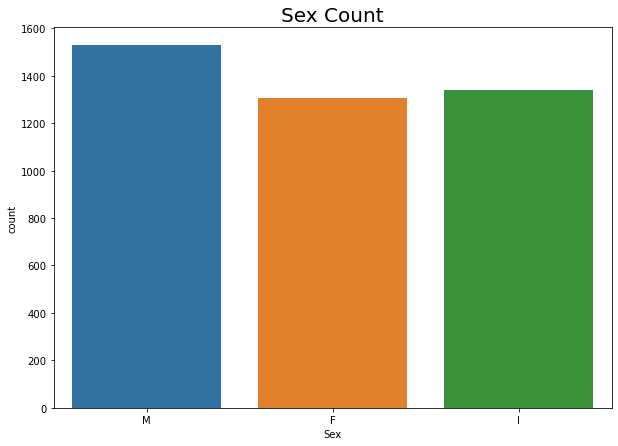

In [44]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


plt.figure(figsize=(10,7))
sns.countplot(x='Sex',data=df)
plt.title("Sex Count",fontsize=20)

#### Observations: 
In the above countplot we can see that list of categories that are present in the 'Sex' column and they are divided into 3 class namely M - Male, F - Female and I - Infant types. Looking at the plot we can see there are is not much of a class imbalance here but we do see the Male options being higher than the other two. If we were going to treat this as a classification problem then we have to apply an oversampling technique to get rid of the slighest of the imbalance.

### Feature Engineering

In [49]:
df['Sex']=df['Sex'].replace({'M':2.0,'F':1.0,'I':0.0})

In [53]:
df.dtypes

Sex               float64
Length            float64
Diameter          float64
Height            float64
Whole weight      float64
Shucked weight    float64
Viscera weight    float64
Shell weight      float64
Age               float64
dtype: object

Now all columns are same data type.

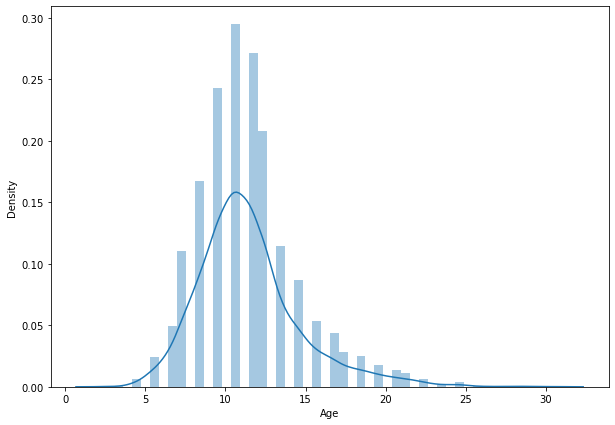

In [48]:
## Let's see the distribution of our target variable:

plt.figure(figsize=(10,7))
sns.distplot(df.Age)

import warnings
warnings.filterwarnings('ignore')

#### Observation:
 It shows that number of rings is not normally distributed. It is right skewed.

## Plotting Distplot:

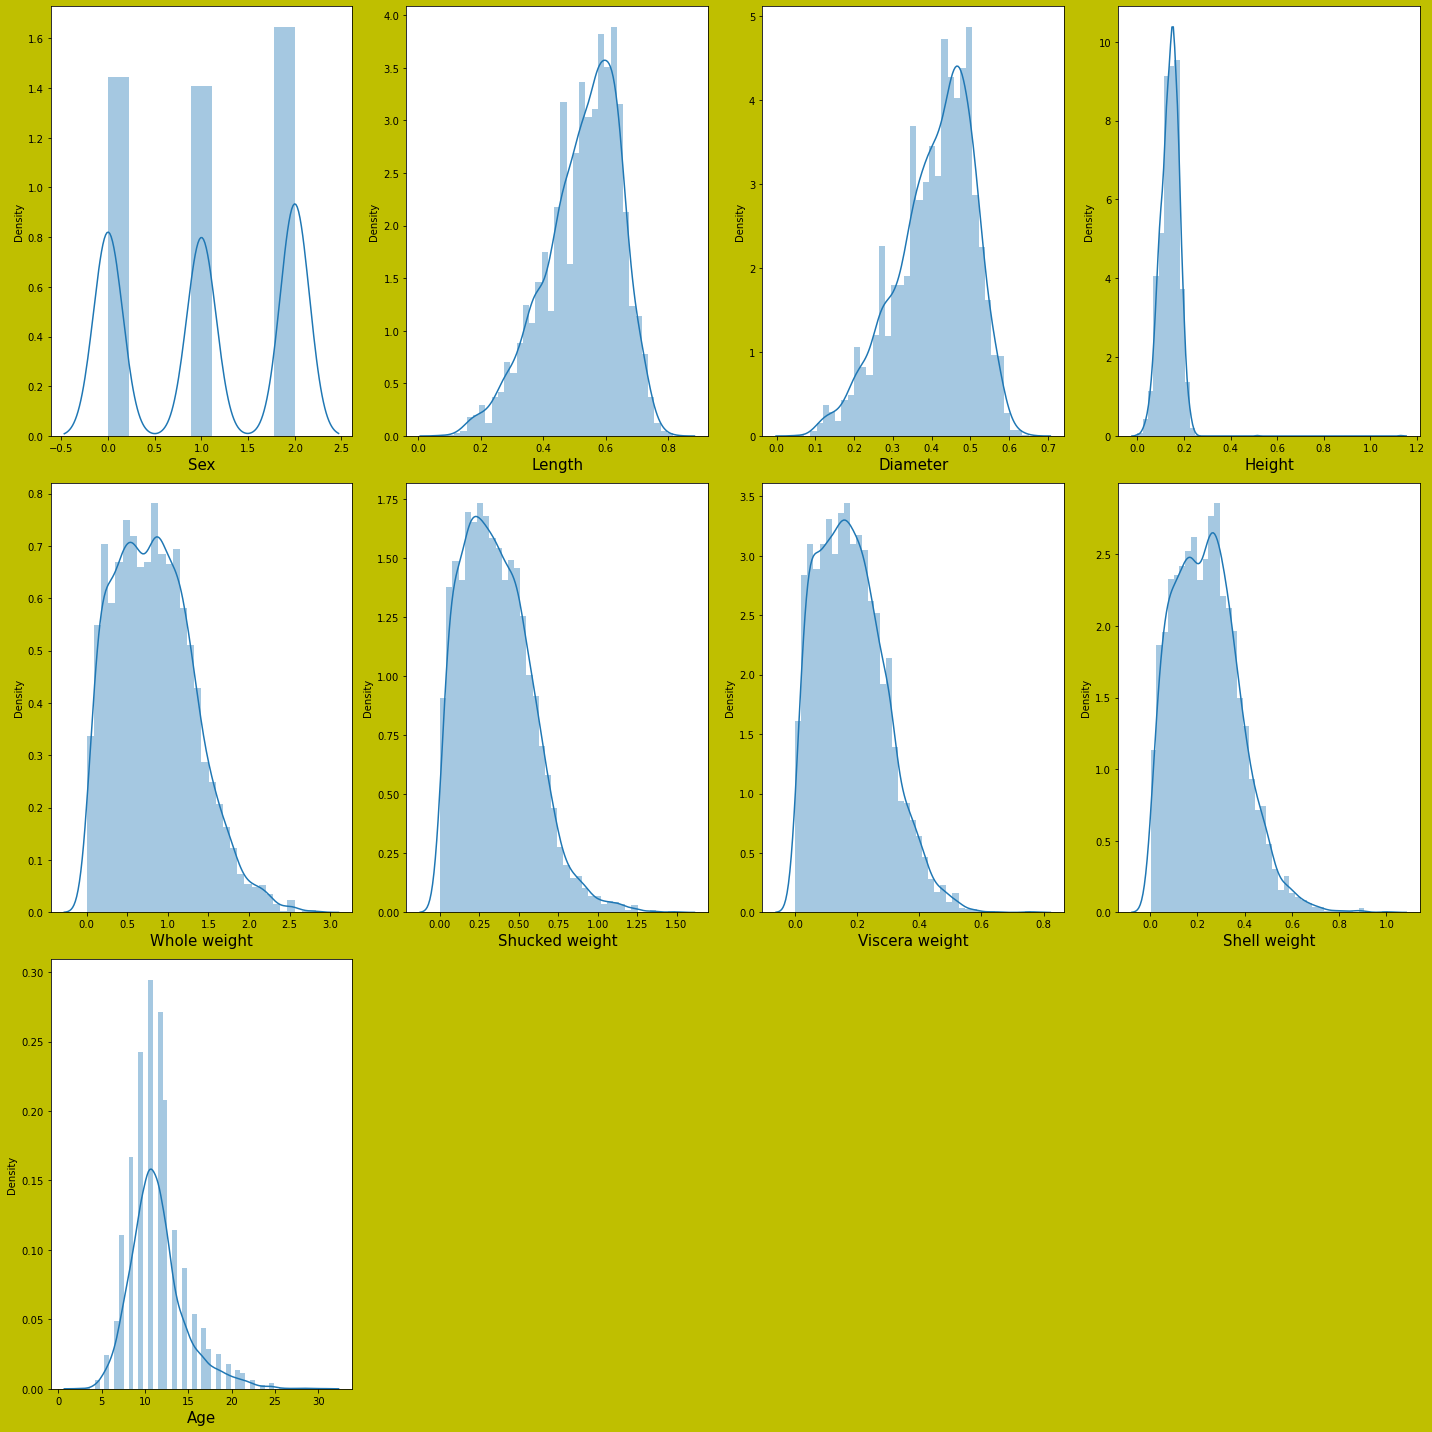

In [55]:
plt.figure(figsize=(20,20),facecolor='y')
plotnumber=1
for column in df:
    if plotnumber<=15:
        ax=plt.subplot(3,4,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column,fontsize=15)
    plotnumber+=1
plt.tight_layout()

## Observation:
- From upper observation we can say Length , Diameter both are left skewed and Height is Power law distributed.
- In the above distribution plots  we see that there are skewness(right skewed) due to the outliers but still many of they are able to retain or rather showcase a bell shape curve indicating a normal distribution. So we can assume that not all outliers are to be removed and some might actually be genuine data therefore the outliers will need to be treated accordingly.

### Let's check the outliers present in our dataset:

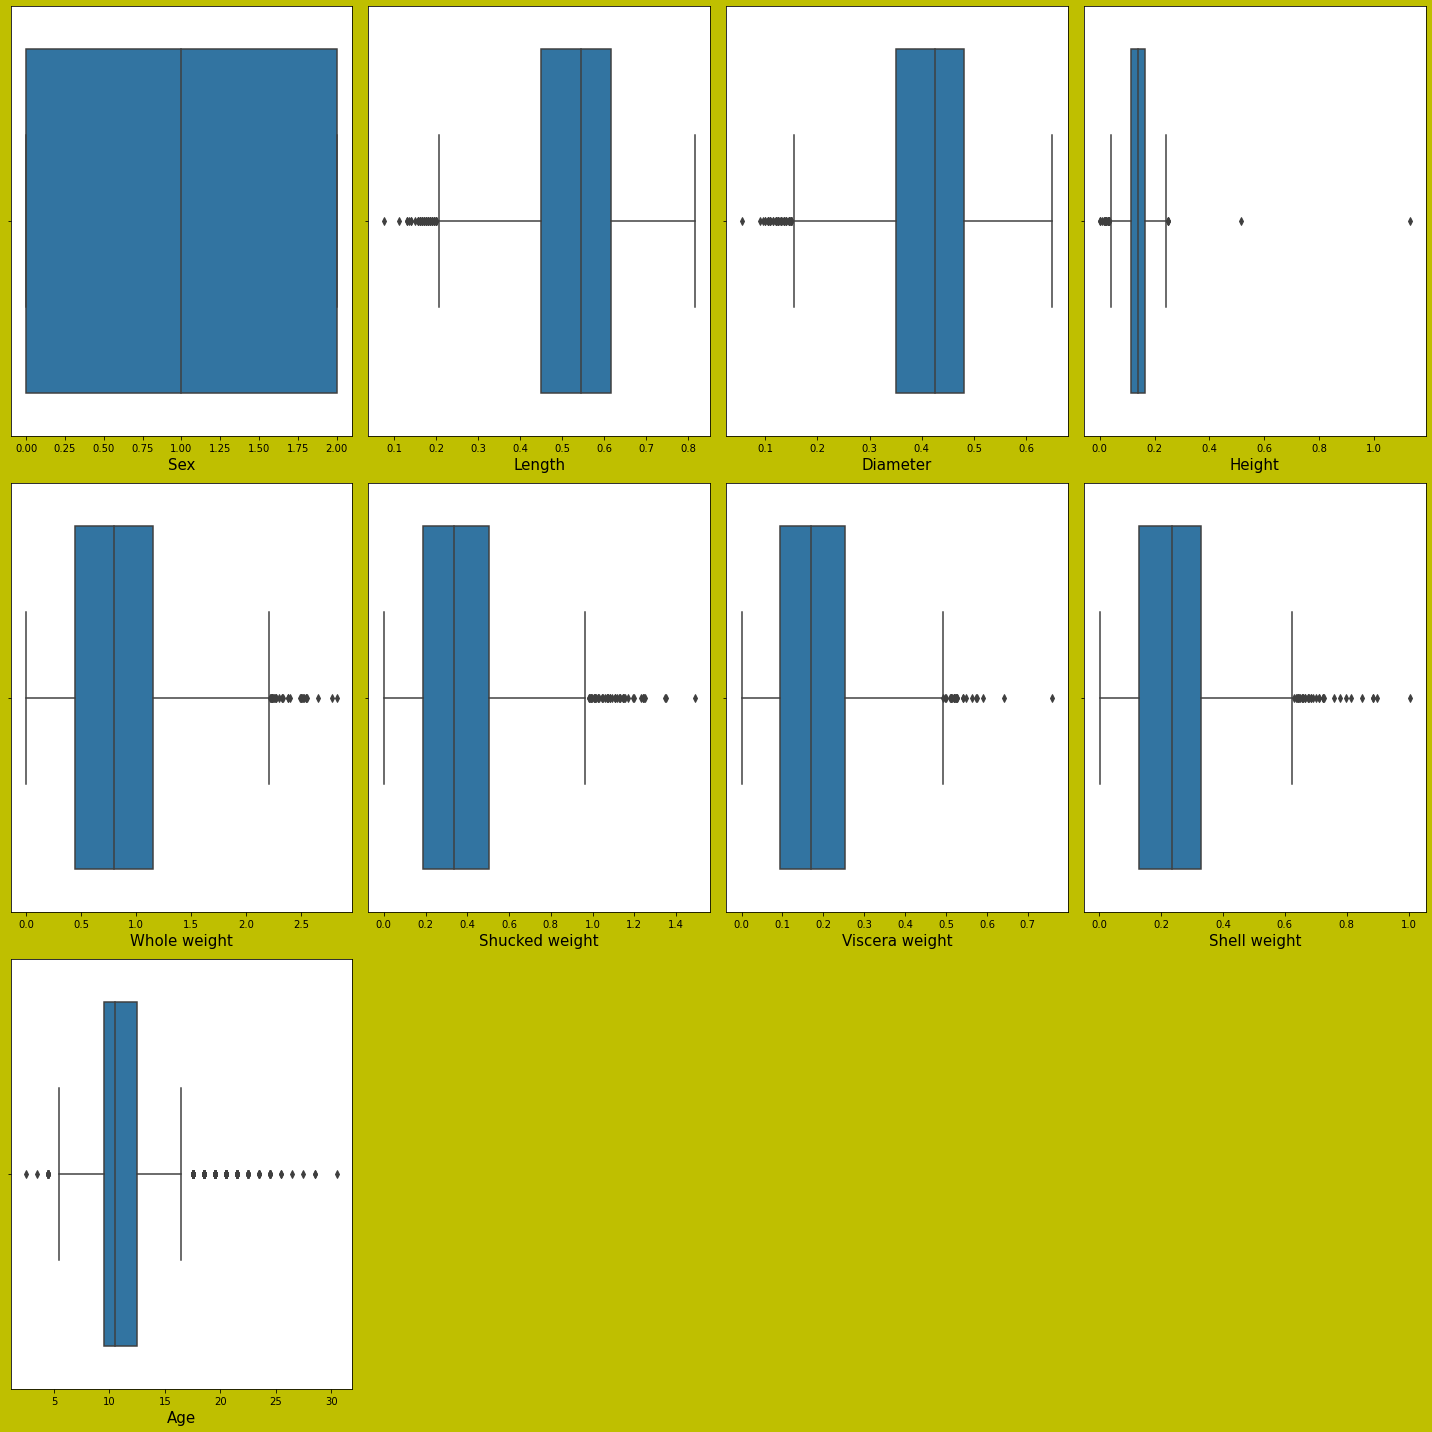

In [56]:
plt.figure(figsize=(20,20),facecolor='y')
plotnumber=1
for column in df:
    if plotnumber<=15:
        ax=plt.subplot(3,4,plotnumber)
        sns.boxplot(df[column])
        plt.xlabel(column,fontsize=15)
    plotnumber+=1
plt.tight_layout()

In [57]:
## Splitting our data set
x=df.drop('Age',axis=1)
y=df['Age']

In [58]:
from sklearn.preprocessing import power_transform
x_new=power_transform(x)
x=pd.DataFrame(x_new, columns=x.columns)

In [62]:
x.skew()

Sex              -0.170446
Length           -0.066669
Diameter         -0.065977
Height           -0.115483
Whole weight     -0.003980
Shucked weight    0.027351
Viscera weight    0.039780
Shell weight      0.023390
dtype: float64

## Observation of Power Transform:
after applying the power transform technique we can see that our skewness has been gone. Our dataset looks fine now.

### After Transformation let's check the outliers

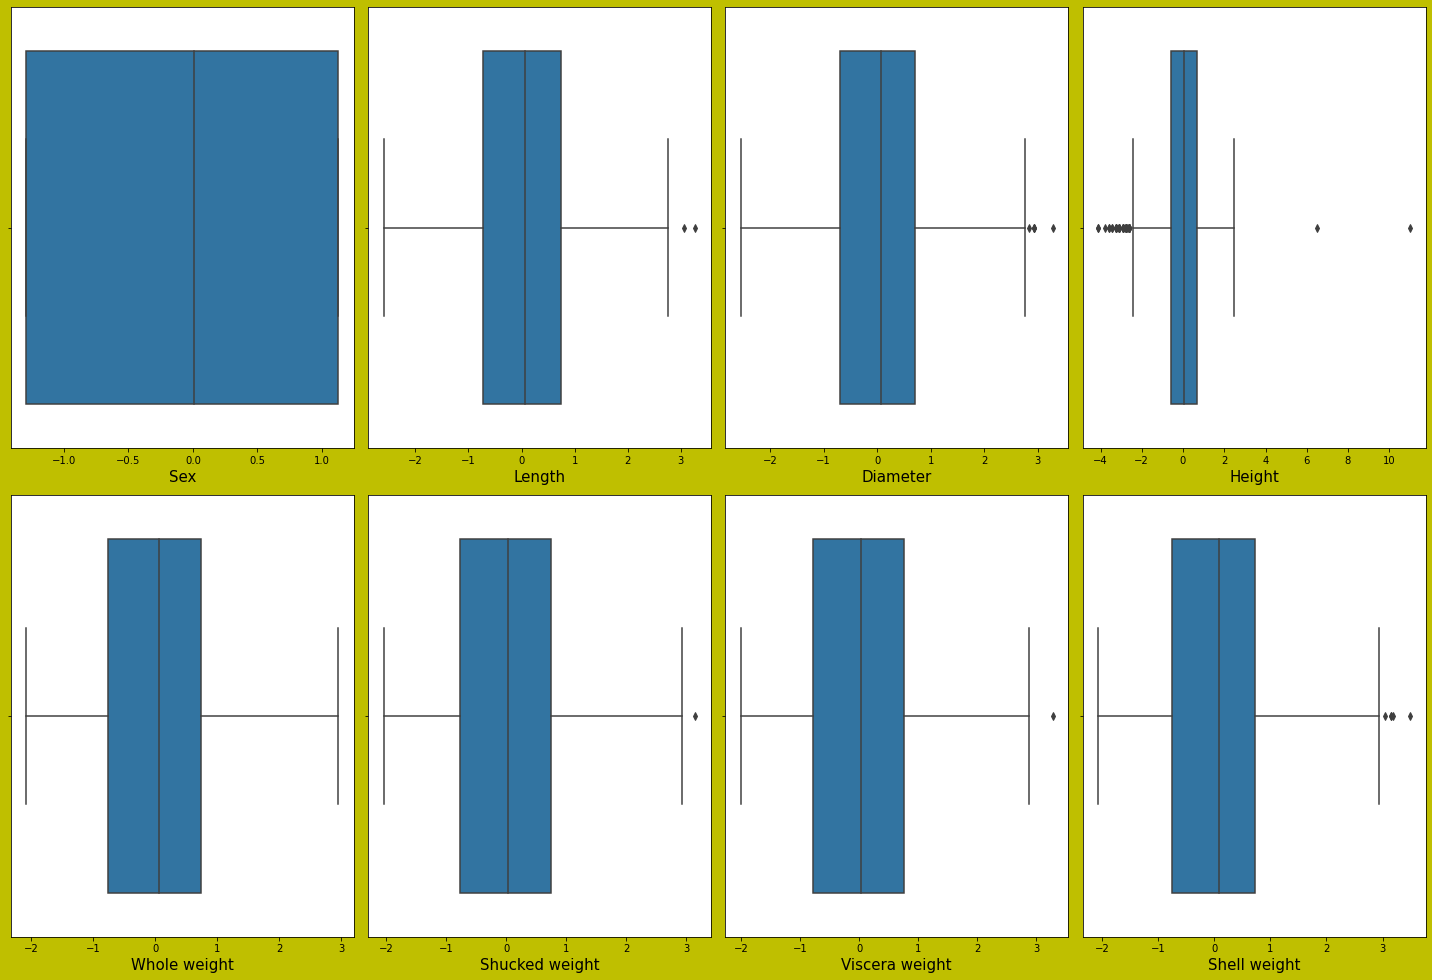

In [60]:
plt.figure(figsize=(20,20),facecolor='y')
plotnumber=1
for column in x:
    if plotnumber<=15:
        ax=plt.subplot(3,4,plotnumber)
        sns.boxplot(x[column])
        plt.xlabel(column,fontsize=15)
    plotnumber+=1
plt.tight_layout()

### Observation:
- As we can see here, we removed lot of outliers without losing any data.
- But 'Height' column has more outliers till now.

## Let's check How data is distributed after transformation Now.

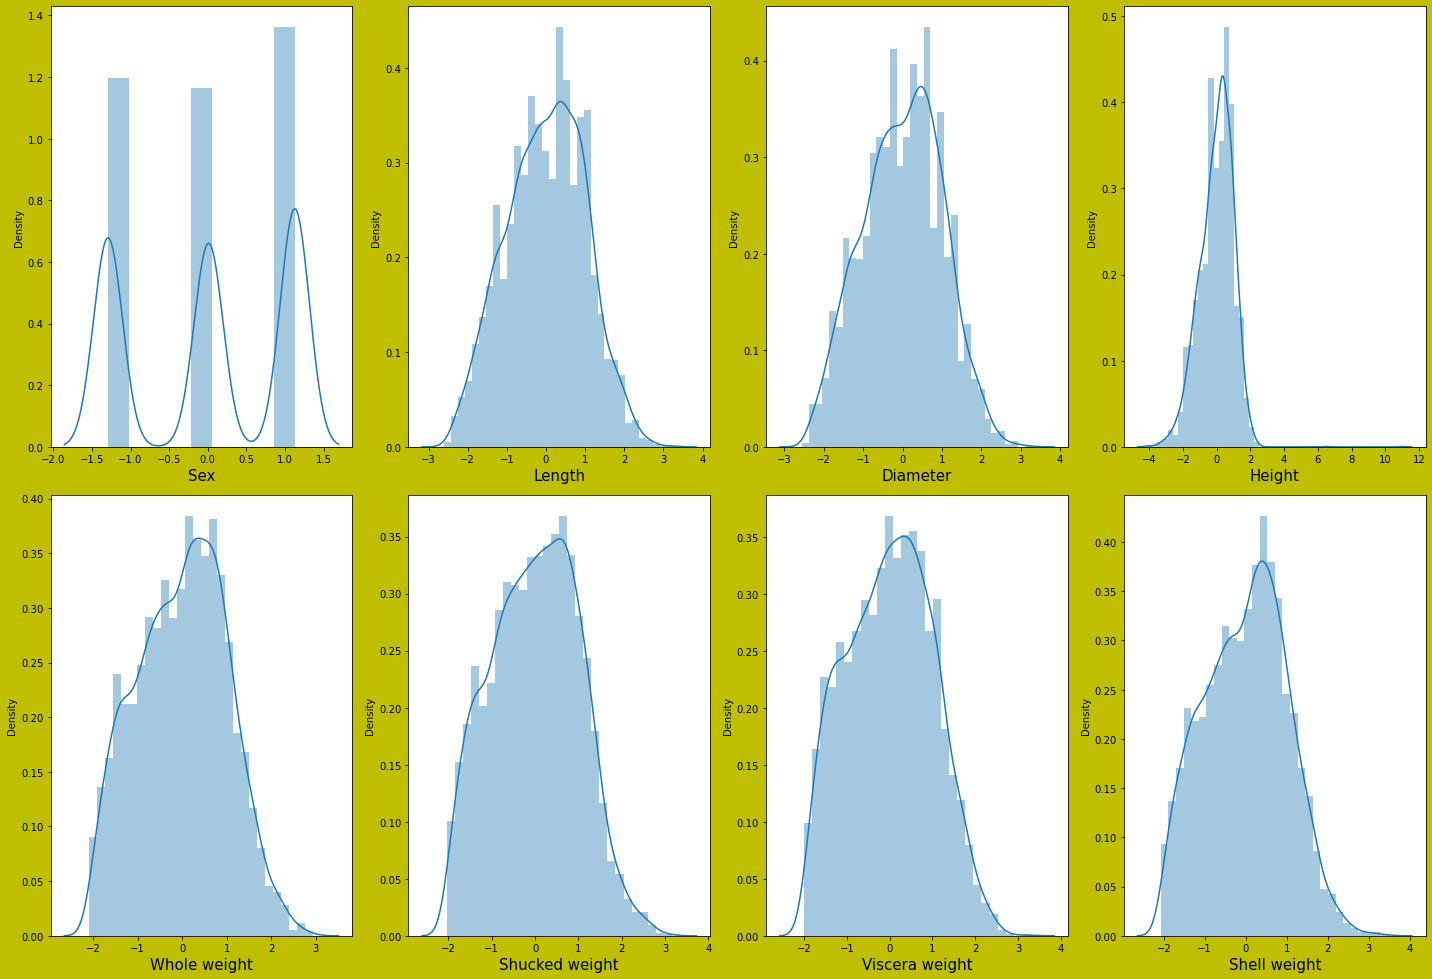

In [61]:
plt.figure(figsize=(20,20),facecolor='y')
plotnumber=1
for column in x:
    if plotnumber<=15:
        ax=plt.subplot(3,4,plotnumber)
        sns.distplot(x[column])
        plt.xlabel(column,fontsize=15)
    plotnumber+=1
plt.tight_layout()

### Observation:
- All the columns are looking quite bellshape curve .
- height columns still right skewed , let's deal with that.

## Find the IQR(Inter Quantile Range) for remove outlier from Height column.

In [76]:
# 1st quantile
q1=df.quantile(0.25)

# 3rd quantile
q3=df.quantile(0.75)
# IQR
iqr=q3-q1

In [77]:
height_high=q3.Height+(1.5*iqr.Height)
print(height_high)
index=np.where(df['Height']>height_high)
df=df.drop(df.index[index])
df.reset_index()
print(df.shape)

0.24000000000000002
(4172, 9)


In [78]:
height_low=q1.Height-(1.5*iqr.Height)
index=np.where(df['Height']<height_low)
df=df.drop(df.index[index])
df.reset_index()
print(df.shape)

(4148, 9)


## Let's Visualize again

In [80]:
x=df.drop('Age',axis=1)
y=df['Age']
x_new=power_transform(x)
x=pd.DataFrame(x_new, columns=x.columns)



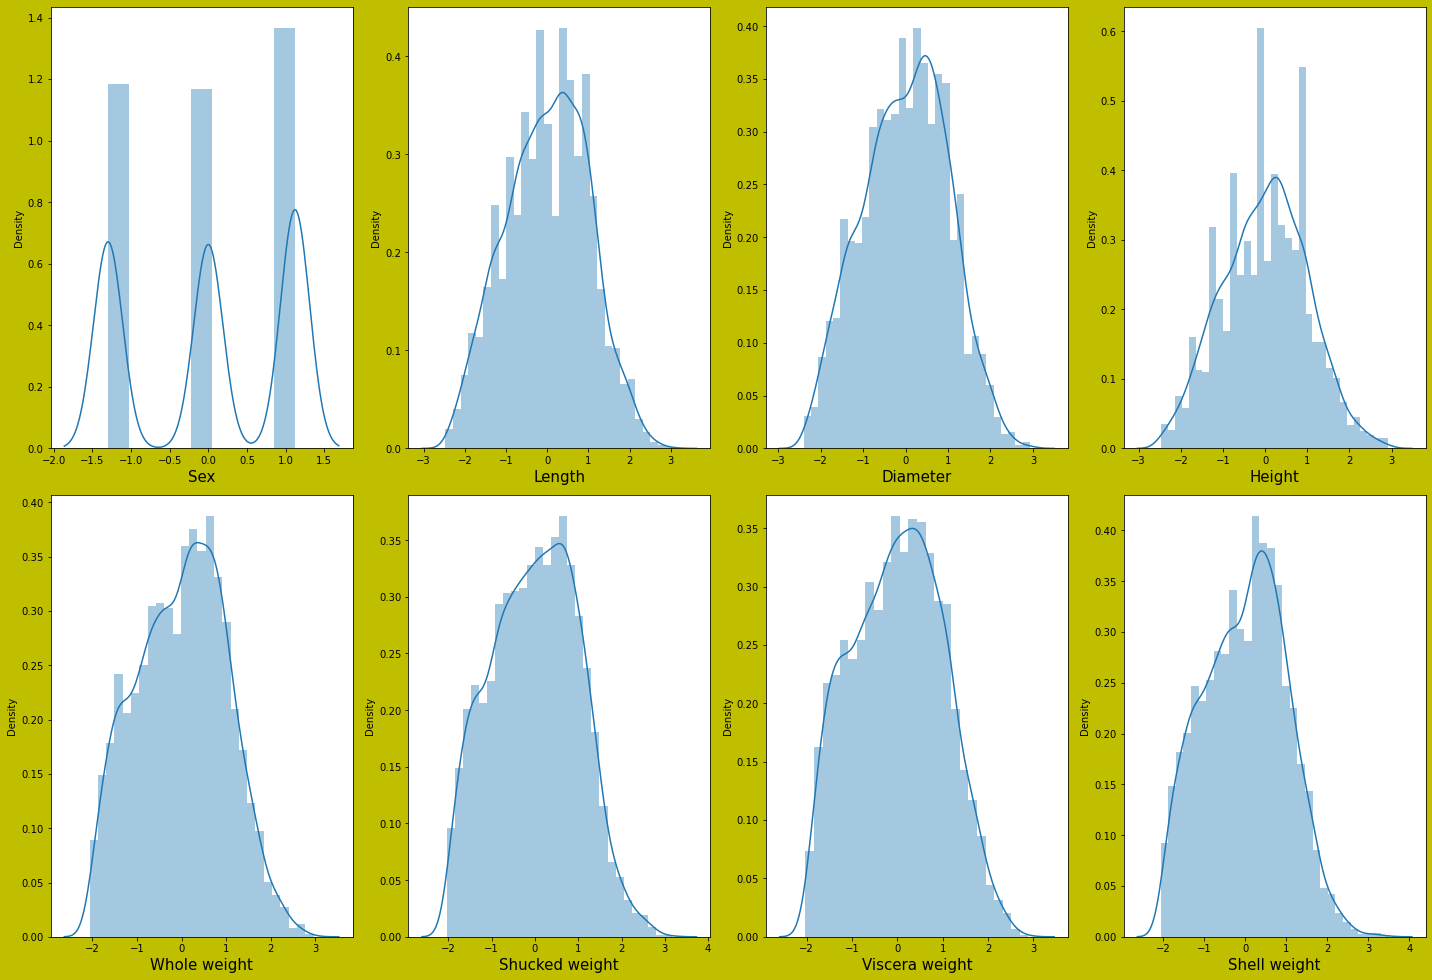

In [81]:
plt.figure(figsize=(20,20),facecolor='y')
plotnumber=1
for column in x:
    if plotnumber<=15:
        ax=plt.subplot(3,4,plotnumber)
        sns.distplot(x[column])
        plt.xlabel(column,fontsize=15)
    plotnumber+=1
plt.tight_layout()

# Observation:
All the coloumns are quite similar to bell shape curve. So now we are successfully remove the outliers and skewness. Now we are good to go.

# Relationship:

##### Let's observe the relation between independent variables and dependent variable.

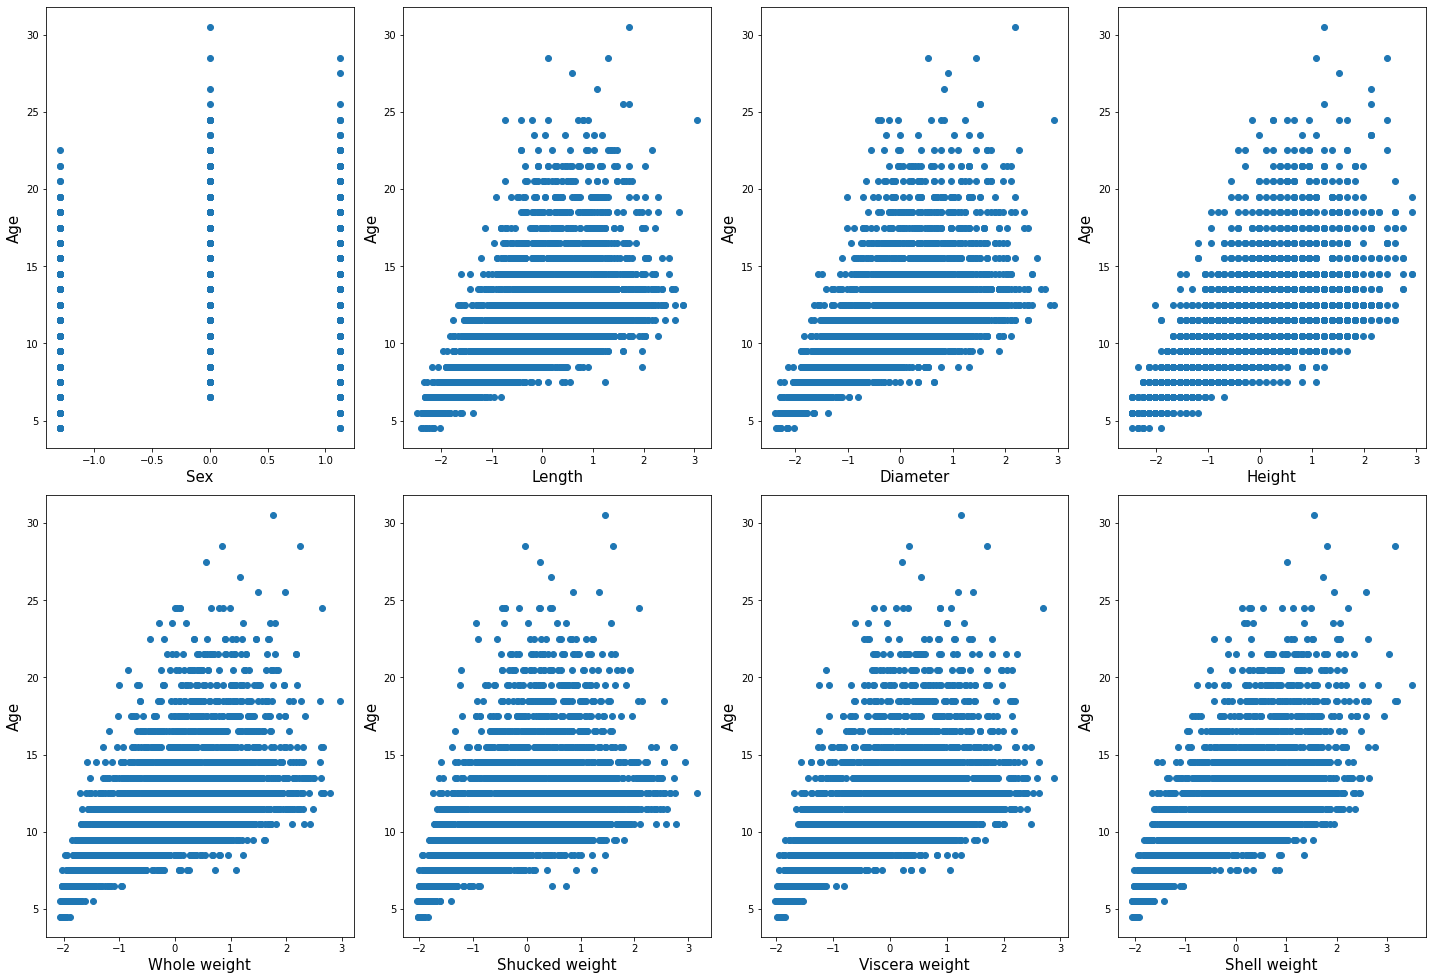

In [82]:
## Visualizing relationship
plt.figure(figsize=(20,20),facecolor='w')
plotnumber=1
for column in x:
    if plotnumber<=15:
        ax=plt.subplot(3,4,plotnumber)
        plt.scatter(x[column],y)
        plt.xlabel(column,fontsize=15)
        plt.ylabel('Age', fontsize=15)
    plotnumber+=1
    plt.tight_layout()

## Observation:
All columns are strongly correlated with the Target variable.

# Correlation:
Let's see the relationship between the columns i.e. feature vs feature

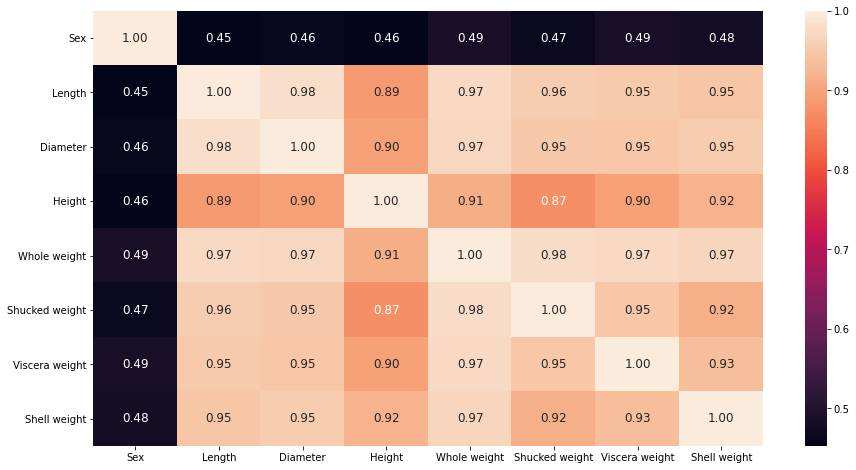

In [83]:
plt.figure(figsize=(15,8))
sns.heatmap(x.corr(),annot=True, annot_kws={'size':12},fmt='.2f')
plt.show()


# Observation of Heatmap:
We have lots of columns that are correralted with each other. In real life, if two features are highly correlated to each other we can drop one of them but in this case we have less columns so we will not do anything.

# Model Selection:
As we can see above their is a high amount of multicollinearity with respects to length, diameter, whole weight, and shucked weight. For this reason it would be best to use a regression which can handle this multicollinearity.Therefore, I shall use the Regressions for my model. This way I dont not have to remove these columns from the dataset.

## Let's Scale our Independent variables:

In [84]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_scaled=scaler.fit_transform(x)

# Linear Regression:

In [100]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor()
lr=LinearRegression()
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split as tts

In [109]:
for i in range(100,500,5):
    x_train,x_test,y_train,y_test=tts(x_scaled,y,test_size=0.20,random_state=i)
    lr.fit(x_train,y_train)
    pred_train=lr.predict(x_train)
    pred_test=lr.predict(x_test)
    print(f"At random state {i}, the training accuracy is :- {r2_score(y_train,pred_train)}")
    print(f"At random state {i}, the testing accuracy is :- {r2_score(y_test,pred_test)}")
    print("\n")
          

At random state 100, the training accuracy is :- 0.5431502836228213
At random state 100, the testing accuracy is :- 0.5404022485105626


At random state 105, the training accuracy is :- 0.5417051637369996
At random state 105, the testing accuracy is :- 0.5451412061696401


At random state 110, the training accuracy is :- 0.5456926914024842
At random state 110, the testing accuracy is :- 0.5292954335261504


At random state 115, the training accuracy is :- 0.5323671601288986
At random state 115, the testing accuracy is :- 0.5825620701571359


At random state 120, the training accuracy is :- 0.54118780351262
At random state 120, the testing accuracy is :- 0.5480741959039932


At random state 125, the training accuracy is :- 0.5387114609251145
At random state 125, the testing accuracy is :- 0.5573781370222713


At random state 130, the training accuracy is :- 0.5348777266641516
At random state 130, the testing accuracy is :- 0.5722396833430572


At random state 135, the training accuracy 

Random State 310 is giving best result.

In [110]:
 x_train,x_test,y_train,y_test=tts(x_scaled,y,test_size=0.20,random_state=310)

In [111]:
lr.fit(x_train,y_train)


LinearRegression()

In [112]:
pred_train=lr.predict(x_train)
r2_score(y_train,pred_train)

0.5334714832606421

In [113]:
y_pred=lr.predict(x_test)

In [114]:
r2_score(y_test,y_pred)

0.5812802106900374

# Cross Validation of the Model:

In [116]:
Train_accuracy=r2_score(y_train,pred_train)
Test_accuracy=r2_score(y_test,y_pred)

from sklearn.model_selection import cross_val_score
for i in range(2,10):
    cv_score=cross_val_score(lr,x_scaled,y,cv=i)
    cv_mean=cv_score.mean()
    print(f"At cross fold {i} the cv_score is {cv_mean} and accuracy score for training is {Train_accuracy} and accuracy for the testing is {Test_accuracy}")
    print("\n")

At cross fold 2 the cv_score is 0.5387320115253837 and accuracy score for training is 0.5334714832606421 and accuracy for the testing is 0.5812802106900374


At cross fold 3 the cv_score is 0.5229158314670205 and accuracy score for training is 0.5334714832606421 and accuracy for the testing is 0.5812802106900374


At cross fold 4 the cv_score is 0.4549430858366407 and accuracy score for training is 0.5334714832606421 and accuracy for the testing is 0.5812802106900374


At cross fold 5 the cv_score is 0.43730777397812703 and accuracy score for training is 0.5334714832606421 and accuracy for the testing is 0.5812802106900374


At cross fold 6 the cv_score is 0.44793689396155983 and accuracy score for training is 0.5334714832606421 and accuracy for the testing is 0.5812802106900374


At cross fold 7 the cv_score is 0.46294733837724056 and accuracy score for training is 0.5334714832606421 and accuracy for the testing is 0.5812802106900374


At cross fold 8 the cv_score is 0.404522299903723

#### Conclusion is that at cv=2 the cv_mean is 53.87 and we also get that our model is not overfit.

## Calculating the Error

In [123]:
from sklearn. metrics import mean_squared_error, mean_absolute_error

In [124]:
y_pred=lr.predict(x_test)
mean_absolute_error(y_test,y_pred)

1.486253257475091

In [125]:
mean_squared_error(y_test,y_pred)

3.996263127916472

In [126]:
np.sqrt(mean_squared_error(y_test,y_pred))

1.999065563686312

- Mean Absolute Error is : -   1.486
- Square Root of Mean Squared Error is : - 1.999

# Hyper Parameter Tunning

In [119]:
from sklearn.linear_model import Lasso,LassoCV

In [120]:
lasso_cv=LassoCV(alphas=None,max_iter=100,normalize=True)
lasso_cv.fit(x_train,y_train)


LassoCV(max_iter=100, normalize=True)

In [121]:
alpha=lasso_cv.alpha_
alpha

3.544913248810242e-05

In [122]:
lasso_reg=Lasso(alpha)
lasso_reg.fit(x_train,y_train)
lasso_reg.score(x_test,y_test)

0.5812780765176991

# Conclusion:
## ` The Final Score is 58.12%.`

# Random Forest Regressor

In [135]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor()
lr=LinearRegression()
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split as tts

In [136]:
for i in range(0,100,5):
    x_train,x_test,y_train,y_test=tts(x_scaled,y,test_size=0.20,random_state=i)
    rf.fit(x_train,y_train)
    pred_train=rf.predict(x_train)
    pred_test=rf.predict(x_test)
    print(f"At random state {i}, the training accuracy is :- {r2_score(y_train,pred_train)}")
    print(f"At random state {i}, the testing accuracy is :- {r2_score(y_test,pred_test)}")
    print("\n")

At random state 0, the training accuracy is :- 0.9354748758722939
At random state 0, the testing accuracy is :- 0.4946144495556001


At random state 5, the training accuracy is :- 0.9348249775117118
At random state 5, the testing accuracy is :- 0.530505274007679


At random state 10, the training accuracy is :- 0.9342592592350593
At random state 10, the testing accuracy is :- 0.5527876726212007


At random state 15, the training accuracy is :- 0.9351612087863662
At random state 15, the testing accuracy is :- 0.496885176997816


At random state 20, the training accuracy is :- 0.9344381785883764
At random state 20, the testing accuracy is :- 0.5217761331939015


At random state 25, the training accuracy is :- 0.9349656387191247
At random state 25, the testing accuracy is :- 0.5125590590084689


At random state 30, the training accuracy is :- 0.9351092788184536
At random state 30, the testing accuracy is :- 0.5397658525405344


At random state 35, the training accuracy is :- 0.93463150040

At random state 60 we get best results.

In [137]:
x_train,x_test,y_train,y_test=tts(x_scaled,y,test_size=0.20,random_state=60)
rf.fit(x_train,y_train)
pred_train=rf.predict(x_train)
pred_test=rf.predict(x_test)
r2_score(y_test,pred_test)

0.569117298564221

# Cross Validation for Ensemble technique

In [138]:
Train_accuracy=r2_score(y_train,pred_train)
Test_accuracy=r2_score(y_test,y_pred)

from sklearn.model_selection import cross_val_score
for i in range(2,10):
    cv_score=cross_val_score(rf,x_scaled,y,cv=i)
    cv_mean=cv_score.mean()
    print(f"At cross fold {i} the cv_score is {cv_mean} and accuracy score for training is {Train_accuracy} and accuracy for the testing is {Test_accuracy}")
    print("\n")

At cross fold 2 the cv_score is 0.527317480357421 and accuracy score for training is 0.932784862621772 and accuracy for the testing is -0.5716811838016789


At cross fold 3 the cv_score is 0.5081052255257168 and accuracy score for training is 0.932784862621772 and accuracy for the testing is -0.5716811838016789


At cross fold 4 the cv_score is 0.437007112519747 and accuracy score for training is 0.932784862621772 and accuracy for the testing is -0.5716811838016789


At cross fold 5 the cv_score is 0.43451802633491815 and accuracy score for training is 0.932784862621772 and accuracy for the testing is -0.5716811838016789


At cross fold 6 the cv_score is 0.44117815280548006 and accuracy score for training is 0.932784862621772 and accuracy for the testing is -0.5716811838016789


At cross fold 7 the cv_score is 0.45662686902462335 and accuracy score for training is 0.932784862621772 and accuracy for the testing is -0.5716811838016789


At cross fold 8 the cv_score is 0.412052458323364 a

at cv=2 we get best result:- 52.73% and we get that our model is not overfitted.

# Hyper Parameter Tunning

In [140]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
parameter={'criterion':['mse','mae'],'max_features':["auto","log2","sqrt"]}
rf=RandomForestRegressor()
clf=GridSearchCV(rf,parameter)
clf.fit(x_scaled,y)
print(clf.best_params_)

{'criterion': 'mse', 'max_features': 'sqrt'}


In [142]:
rf=RandomForestRegressor(criterion="mse",max_features="sqrt")
rf.fit(x_train,y_train)
rf.score(x_train,y_train)
pred_decision=rf.predict(x_test)


rfs=r2_score(y_test,pred_decision)
print('R2 Score ', rfs*100)

rfscore=cross_val_score(rf,x_scaled,y,cv=2)
rfc=rfscore.mean()
print('cross val score ', rfc*100)

R2 Score  58.376854099201566
cross val score  53.50928594485023


# Saving our Model

In [143]:
import pickle
filename='Abalon.pkl'
pickle.dump(rf,open(filename,'wb'))